In [1]:
#importing all of the libraries that will be needed
import pandas as pd 
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import statistics as stats
from IPython.display import display, HTML

In [2]:
# Inserting some images that is related to the assignment topic

# Paths to my image files
image_paths = ['11.jpg', '12.jpg', '13.jpg']

# Generate HTML code to display images side by side
images_html = ''.join([f'<img src="{path}" style="width: 310px; margin: 0px; float: left;" />' for path in image_paths])

# Display HTML code
display(HTML(images_html))

In [3]:
#Read files from the URL into the pandas DataFrame
# make sure to reference where you got the dataswt (CSO - Tourism)
url = "airandtravel1.csv"
df = pd.read_csv(url) 

## Where did Ireland's Tourists Come From? Cleaning and Preperation
This section will aim use data preperation methods such a `.head()` , `.shape`, `describe`, `info.()` etc to clean and sort the data first

In [4]:
# is there an increase in certain countries? Let's experiment 
# which countries spent the most money, are they increasling spending money YoY
# how much money can ireland expect in 2024/2025 : ML

#Using .head() to get a sense for the data, its structure and content
df.head()

,STATISTIC Label,Year,Month,Country,Direction,UNIT,VALUE
0,Air and Sea Travel,2010,January,Great Britain,Arrivals,Thousand,361.5
1,Air and Sea Travel,2010,January,Great Britain,Departures,Thousand,407.6
2,Air and Sea Travel,2010,January,Other UK (1),Arrivals,Thousand,0.9
3,Air and Sea Travel,2010,January,Other UK (1),Departures,Thousand,1.1
4,Air and Sea Travel,2010,January,Belgium,Arrivals,Thousand,12.5


In [5]:
df.shape

(6084, 7)

In [6]:
# Count occurrences of "thousand" in the 'UNIT' feature. If 100% of data in this unit is thousand we will drop the column
#Reason for this is it is ir
thousand_count = (df['UNIT'] == 'Thousand').sum()

# Calculating total number of observations
total_rows = len(df)

# Calculate percentage of times out of 100 that 'Thousand' was the unit of measurement 
percentage_thousand = (thousand_count / total_rows) * 100

print("Percentage of 'thousand' in the 'UNIT' column:", percentage_thousand)

# for report - need reference 
#it's perfectly fine to drop a column if it contains the exact same value for all rows in the DataFrame, especially if that value doesn't provide any additional information beyond what's already known or can be communicated through metadata or other means.
#In your case, if the 'UNIT' column contains the same value ('thousands') for all rows and this information is already conveyed to the reader or user of the data, there's no need to keep that column in the DataFrame. You can safely drop it to simplify the structure of your DataFrame and make it more efficient.
#Dropping such redundant columns can improve the clarity and efficiency of your data analysis and visualization processes


Percentage of 'thousand' in the 'UNIT' column: 100.0


In [7]:
# Drop the 'UNIT' column
df.drop(columns=['UNIT'], inplace=True)

In [8]:
# only keep the observations that are arrivals
df_update = df[df['Direction'] == 'Arrivals']

In [9]:
# check to see the head 
df_update.head()

,STATISTIC Label,Year,Month,Country,Direction,VALUE
0,Air and Sea Travel,2010,January,Great Britain,Arrivals,361.5
2,Air and Sea Travel,2010,January,Other UK (1),Arrivals,0.9
4,Air and Sea Travel,2010,January,Belgium,Arrivals,12.5
6,Air and Sea Travel,2010,January,Germany,Arrivals,45.3
8,Air and Sea Travel,2010,January,Spain,Arrivals,68.6


In [10]:
#Here i am dropping any data before 2021, as I was to work with the timeframe 2021-2023
#df_filtered = df_update[df_update['Year'] >= 2023]

# Reset index 
#df_filtered.reset_index(drop=True, inplace=True)

#my df is now called df_filtered

In [11]:
#df_filtered.head()

In [12]:
#df_filtered.shape

In [13]:
# This provides me with information such as the datatypes. 
#df_filtered.info()

In [14]:
df.describe()
# because only value and year is an integer type (float) I am only returned with two coulmn of data for my statistical analsis 

,Year,VALUE
count,6084.000000,6080.000000
mean,2016.544379,136.604638
std,4.060471,316.126348
min,2010.000000,0.000000
25%,2013.000000,12.800000
50%,2017.000000,36.100000
75%,2020.000000,85.400000
max,2024.000000,2270.700000


In [15]:
df.isnull().sum()

STATISTIC Label    0
Year               0
Month              0
Country            0
Direction          0
VALUE              4
dtype: int64

In [16]:
# Checking against some malform data - get reference about malform data
mal = ["n.a", "?", "NA", "n/a", "na", "--"]
df = pd.read_csv("airandtravel1.csv" , na_values=mal)

In [17]:
df.isnull().sum()

STATISTIC Label    0
Year               0
Month              0
Country            0
Direction          0
UNIT               0
VALUE              4
dtype: int64

In [18]:
mean_value = df['VALUE'].mean()

# Fill NaN values with the mean of VALUE - give reference in report as to why this is important
df['VALUE'].fillna(mean_value, inplace=True)

In [19]:
# Now my dataset is clean and there are no NaN, mal or missing values
df.isnull().sum()

STATISTIC Label    0
Year               0
Month              0
Country            0
Direction          0
UNIT               0
VALUE              0
dtype: int64

## Where did Ireland's Tourists Come From? Statistical Anaylsis

In [20]:
# Filter the DataFrame for the desired year (e.g., 2023)
df_23 = df[df['Year'] == 2023]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_23.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df)


                                              Country  Percentage of Visitors
0                                       All countries               49.999758
1                                             Belgium                0.616937
2                                              France                3.437150
3                                             Germany                2.452475
4                                       Great Britain               17.451433
5                                               Italy                2.436355
6                                         Netherlands                1.761482
7                                 Other Countries(42)                1.117880
8                                   Other Europe (34)                0.499973
9                    Other Transatlantic Countries(1)                0.630997
10                                       Other UK (1)                0.084480
11                                             Poland           

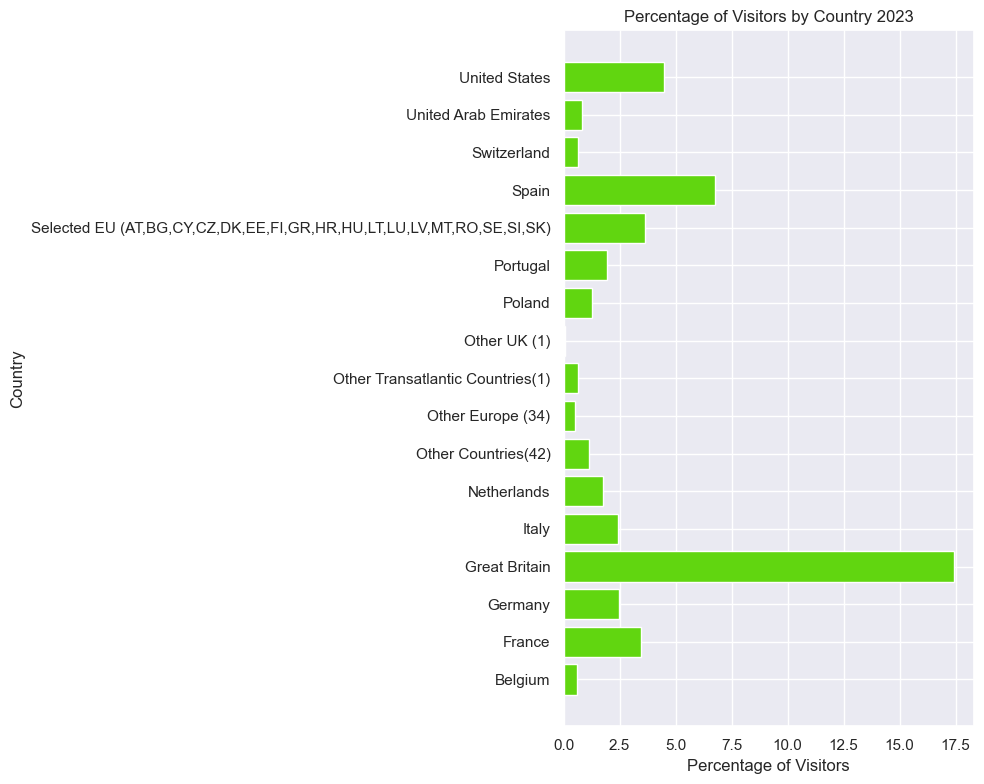

In [21]:
# removing all countries as skews data
df_filtered = result_df[result_df['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'], color='#61d610',)
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2023')
plt.tight_layout()
plt.show()


In [22]:
# Filter the DataFrame for the desired year (e.g., 2023)
df_16 = df[df['Year'] == 2016]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_16.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_16 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_16)

                                              Country  Percentage of Visitors
0                                       All countries               50.000427
1                                             Belgium                0.719544
2                                              France                3.210274
3                                             Germany                2.830226
4                                       Great Britain               21.290797
5                                               Italy                1.850724
6                                         Netherlands                1.748704
7                                 Other Countries(42)                0.373361
8                                   Other Europe (34)                0.377629
9                    Other Transatlantic Countries(1)                0.490747
10                                       Other UK (1)                0.094194
11                                             Poland           

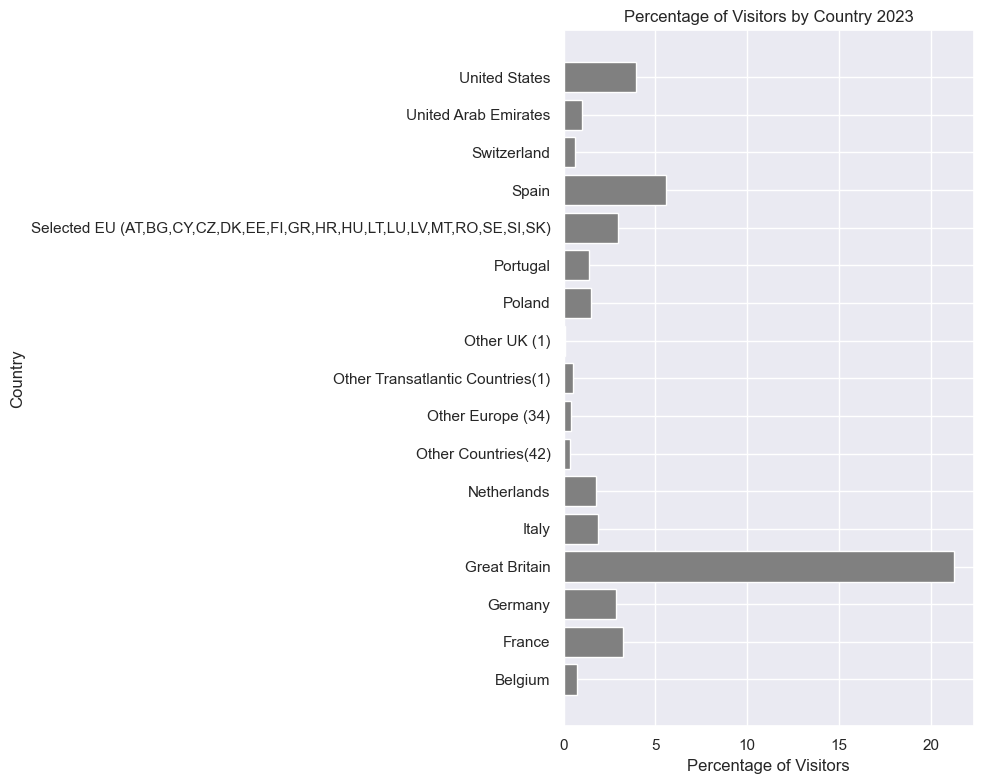

In [23]:
# removing all countries as skews data
df_filtered = result_df_16[result_df_16['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'], color='gray',)
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2016')
plt.tight_layout()
plt.show()

In [24]:
# Filter the DataFrame for the desired year (e.g., 2023)
df_10 = df[df['Year'] == 2010]

# Group by 'Country' and calculate the sum of 'Value' for each country
country_visitors = df_10.groupby('Country')['VALUE'].sum()

# Calculate the total number of visitors
total_visitors = country_visitors.sum()

# Calculate the percentage of visitors for each country
country_percentages = (country_visitors / total_visitors) * 100

# Create a new DataFrame to store the results
result_df_10 = pd.DataFrame({'Country': country_percentages.index, 'Percentage of Visitors': country_percentages.values})

# Display the result
print(result_df_10)

                                              Country  Percentage of Visitors
0                                       All countries               50.000000
1                                             Belgium                0.631429
2                                              France                3.661356
3                                             Germany                2.581092
4                                       Great Britain               23.607217
5                                               Italy                1.747707
6                                         Netherlands                1.292289
7                                 Other Countries(42)                0.473039
8                                   Other Europe (34)                0.276891
9                    Other Transatlantic Countries(1)                0.168265
10                                       Other UK (1)                0.103592
11                                             Poland           

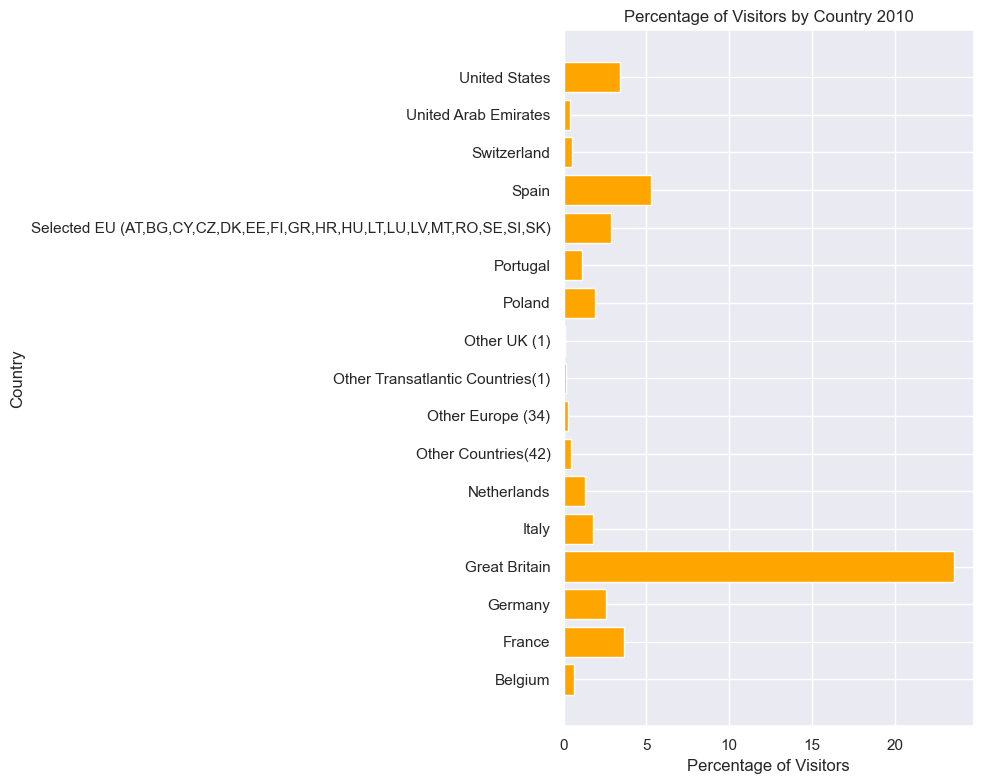

In [25]:
# removing all countries as skews data
df_filtered = result_df_10[result_df_10['Country'] != 'All countries']


# Plotting the horizontal bar plot
plt.figure(figsize=(10, 8))
plt.barh(df_filtered['Country'], df_filtered['Percentage of Visitors'], color='orange',)
plt.xlabel('Percentage of Visitors')
plt.ylabel('Country')
plt.title('Percentage of Visitors by Country 2010')
plt.tight_layout()
plt.show()

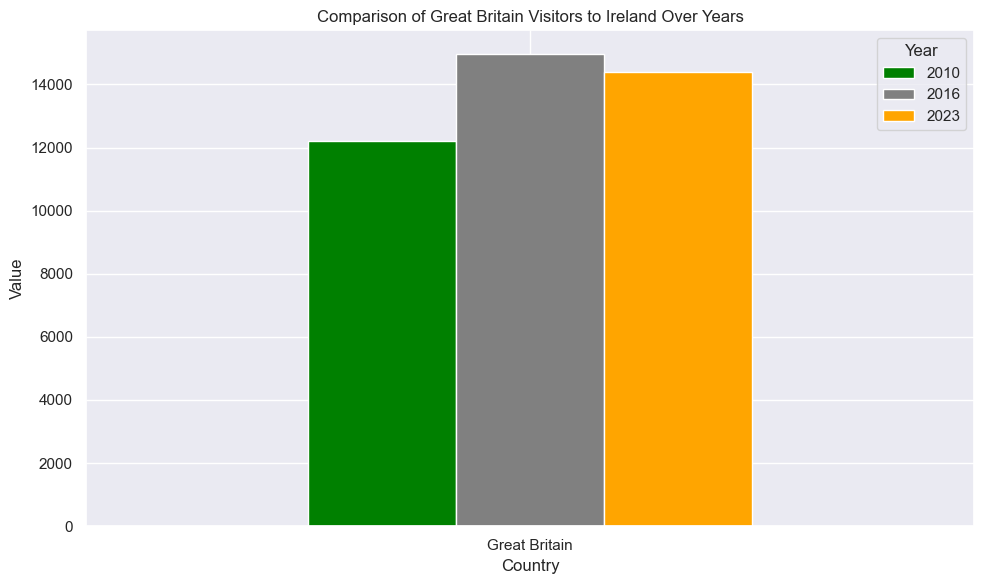

In [26]:
years = [2010, 2016, 2023]
df_filtered = df[(df['Year'].isin(years)) & (df['Country'] == 'Great Britain')]

colors = ['green', 'gray', 'orange']

# Group by 'Year' and sum the 'VALUE' column
df_grouped = df_filtered.groupby(['Country', 'Year']).sum().reset_index()

# Pivot the DataFrame to have years as columns and 'VALUE' as values
pivot_df = df_grouped.pivot(index='Country', columns='Year', values='VALUE')

# Plotting the bar plot
pivot_df.plot(kind='bar', figsize=(10, 6),color=colors)
plt.title('Comparison of Great Britain Visitors to Ireland Over Years')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.tight_layout()
plt.show()



## Where did Ireland's Tourists Come From? Visualisation

In [ ]:
from geopy.geocoders import Nominatim
import time  # Import time module for adding delays

# Assuming filtered_df is your DataFrame
# Initialize the geocoder with a unique user agent
geolocator = Nominatim(user_agent="my_geocoder")

# Function to get latitude and longitude for a country
def get_lat_long(country):
    # Add a delay to respect rate limits
    time.sleep(1)  # Sleep for 1 second between requests
    location = geolocator.geocode(country)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Add latitude and longitude columns to the DataFrame
df['Latitude'], df['Longitude'] = zip(*df['Country'].apply(get_lat_long))


In [ ]:
df.head()

In [ ]:
import folium
from folium.plugins import HeatMap

df.dropna(subset=['Latitude', 'Longitude'], inplace=True)


m = folium.Map(location=[0, 0], zoom_start=4)

heat_data = [[row['Latitude'], row['Longitude']] for index, row in df_filtered.iterrows()]


# Add a heatmap layer using the latitude and longitude data

HeatMap(heat_data).add_to(m)

# Save the map to an HTML file
m.save('heatmap.html')

m

#Blue areas signify regions with fewer meteorite landings.
#Red areas signify regions with more meteorite landings.


In [ ]:
# other questions: where are they staying , counties, accomodations 
